# Data Analysis - Clustering
## Boston Housing Price

### Basic Info about dataset  
** Data Sources:**  

    (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.  
    (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management,   
                            vol.5, 81-102, 1978.  
    (c) Date: July 7, 1993  
  
** Attribute Information:**  

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollar
    11. PTRATIO  pupil-teacher ratio by town  
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population  
    14. MEDV     Median value of owner-occupied homes in 1,000 dollar's

### Contents

(1) Data wrangling  
(2) Clustering  

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 200) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## (1) Data wrangling

In [12]:
boston = pd.read_csv('boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [17]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.0626,0.0000,11.9300,0,0.5730,6.5930,69.1000,2.4786,1,273,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0,0.5730,6.1200,76.7000,2.2875,1,273,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0,0.5730,6.9760,91.0000,2.1675,1,273,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0,0.5730,6.7940,89.3000,2.3889,1,273,21.0000,393.4500,6.4800,22.0000
505,0.0474,0.0000,11.9300,0,0.5730,6.0300,80.8000,2.5050,1,273,21.0000,396.9000,7.8800,11.9000


** Statistics summary **

In [14]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


** Scatter plot matrix **

/Users/nishimuraaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


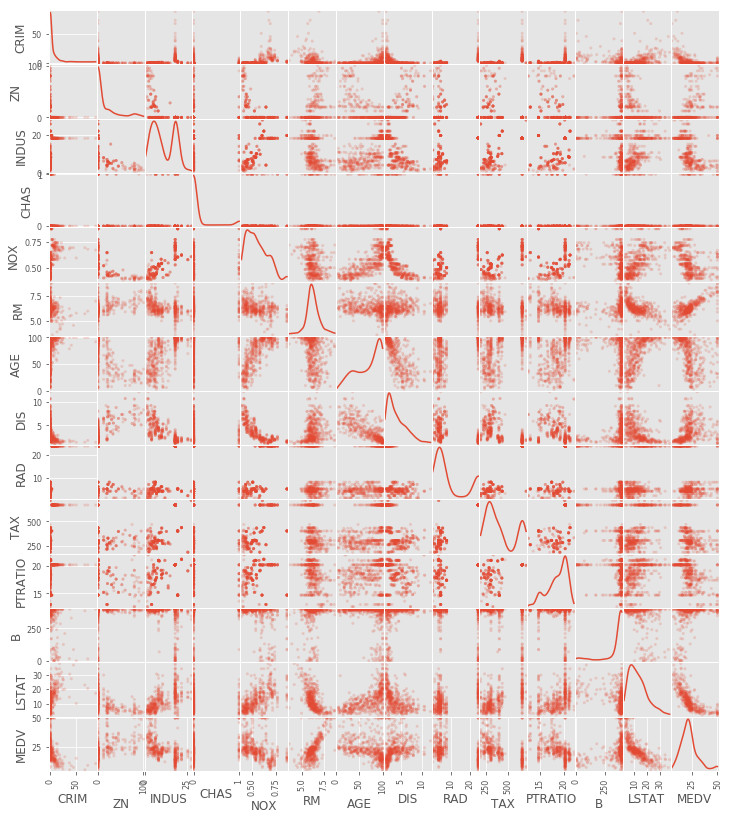

In [16]:
# takes the dataset, an alpha value for opacity, a figure size setting, and a specification of the diagonal charts
output = pd.scatter_matrix(boston, alpha=0.2, figsize = (12, 14),diagonal='kde')

** Correlation matrix **

In [21]:
bcorr = boston.corr()
bcorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


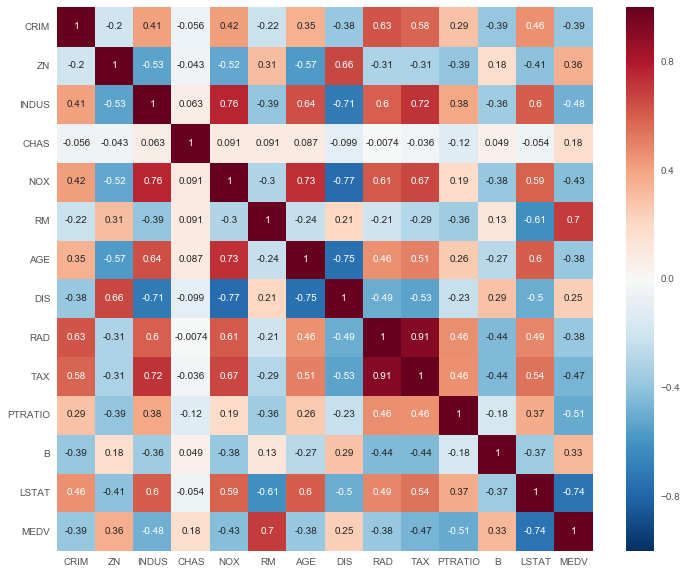

In [28]:
plt.subplots(figsize=(12,10)) 
sns.heatmap(bcorr, annot=True)

## (2) Clustering
Clustering is regarded as unsupervised learning, which does not have a correct answer. This analysis does not predict future, but is useful to reveal the structure of dataset and capture insights from dataset. In this note, I will use K-means.

Based on the scatter plot matrix and correlation matrix, I decided to use the following seven features to implement clustering.

In [114]:
df1 = boston[["INDUS", "NOX", "RM", "TAX", "PTRATIO", "LSTAT", "MEDV"]]
df1

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.3100,0.5380,6.5750,296,15.3000,4.9800,24.0000
1,7.0700,0.4690,6.4210,242,17.8000,9.1400,21.6000
2,7.0700,0.4690,7.1850,242,17.8000,4.0300,34.7000
3,2.1800,0.4580,6.9980,222,18.7000,2.9400,33.4000
4,2.1800,0.4580,7.1470,222,18.7000,5.3300,36.2000
5,2.1800,0.4580,6.4300,222,18.7000,5.2100,28.7000
6,7.8700,0.5240,6.0120,311,15.2000,12.4300,22.9000
7,7.8700,0.5240,6.1720,311,15.2000,19.1500,27.1000
8,7.8700,0.5240,5.6310,311,15.2000,29.9300,16.5000
9,7.8700,0.5240,6.0040,311,15.2000,17.1000,18.9000


### Pre-processing

The range of data points are various depending on the feature. For example, in this dataset, the value range of TAX (187~711) is by far larger than other features, such as INDUX's (0.46~27.74). Since large values may dominate the clustering results, data scaling should be applied before clustineg.  In general, there are two ways to scal data: 0-1 standardization (which is often called normalization) and z-score standardization.
In this note, I will use a function in scikit learn in order to use z-score standardization, which scales the values based on the mean and variance. 

$ z = \frac{x\ -\ mean}{standard\ deviation} $


***(Note)***  
* 0-1 standardization scales the value to between 0 and 1, which is formulated as follows.  
    $ z = \frac{x\ -\ min.\ value\ of\ x}{max\ value\ of\ x \ - min.\ value\ of\ x} $  

In [115]:
import sklearn.preprocessing as preprocessing
scaled = preprocessing.scale(df1) 

In [116]:
scaled

array([[-1.2879095 , -0.14421743,  0.41367189, ..., -1.45900038,
        -1.0755623 ,  0.15968566],
       [-0.59338101, -0.74026221,  0.19427445, ..., -0.30309415,
        -0.49243937, -0.10152429],
       [-0.59338101, -0.74026221,  1.28271368, ..., -0.30309415,
        -1.2087274 ,  1.32424667],
       ..., 
       [ 0.11573841,  0.15812412,  0.98496002, ...,  1.17646583,
        -0.98304761,  0.14880191],
       [ 0.11573841,  0.15812412,  0.72567214, ...,  1.17646583,
        -0.86530163, -0.0579893 ],
       [ 0.11573841,  0.15812412, -0.36276709, ...,  1.17646583,
        -0.66905833, -1.15724782]])

### K-means

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets

K-means algorithm requires to pre-determine the number of clusters prior to implementation. To decide the optimal number of clusters, I will use Elbow method and Silhouette score.

** Elbow Method **

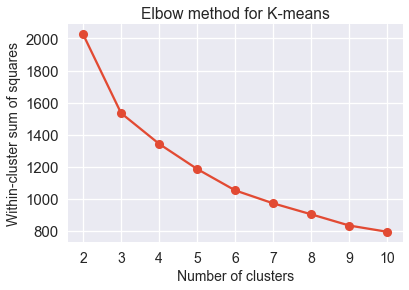

In [188]:
# Create range of clusters 
range_n_clusters = list(range(2,11))

# Elbow - K means
distortions = []

for i  in range(2,11):                # 2~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=200,
                random_state=0)
    km.fit(scaled)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

sns.set_style('darkgrid')
sns.set_context("talk") 
plt.figure(figsize=(6,4))
plt.plot(range(2,11), distortions,marker='o') # linewidth=3, markersize=10
plt.xlim()
#plt.xticks([0.7,2,3.4], ["a","b","c"])
plt.xticks(range_n_clusters, range_n_clusters, fontsize = 14)
plt.yticks(fontsize = 15)
#plt.tick_params(labelsize=13)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Within-cluster sum of squares' , fontsize=14)
plt.title("Elbow method for K-means")
plt.show();

Since there is no clear elbow point, I will try the different method to determine the optimal number of clusters.

** Silhouette score **

For n_clusters = 2. The average silhouette_score is : 0.40697952165593865
For n_clusters = 3. The average silhouette_score is : 0.35192600385215866
For n_clusters = 4. The average silhouette_score is : 0.3501317567108453
For n_clusters = 5. The average silhouette_score is : 0.28447577099604343
For n_clusters = 6. The average silhouette_score is : 0.2768025212591526
For n_clusters = 7. The average silhouette_score is : 0.2883856302360219
For n_clusters = 8. The average silhouette_score is : 0.2689935047762544
For n_clusters = 9. The average silhouette_score is : 0.26266990183069655
For n_clusters = 10. The average silhouette_score is : 0.23445808073672647


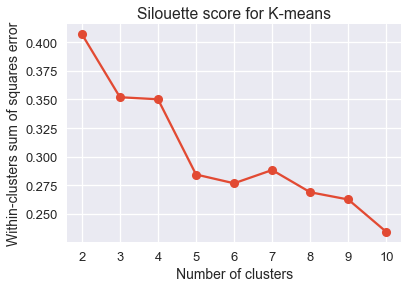

In [120]:
# Silhouette_score - K means
# Loop through clusters
s = []
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=200,
                random_state=0).fit(scaled)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(scaled)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(scaled, preds, metric='euclidean')
    s.append(score)
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))
    
plt.figure(figsize=(6,4)) 
plt.plot(s,marker='o')
plt.ylabel("Silouette", fontsize=14)
plt.xlabel("Number of clusters", fontsize=14)
plt.title("Silouette score for K-means")
plt.xlim()
plt.xticks(range(9), range(2,11))
plt.ylabel('Within-clusters sum of squares error' , fontsize=14)
sns.despine()

Considering the results of Elbow method and Silhouette score, I will use 6 as a number of clusters.

In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled)     # PCAで得た12主成分を用いてkmeansする

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 3, 0, 3, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 3, 0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5,
       3, 3, 3, 5, 5, 3, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 3, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 2, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0,
       3, 0,

In [124]:
df_kmeans = pd.concat([pd.DataFrame(scaled), pd.DataFrame(kmeans_labels)], axis=1)

In [157]:
# Create a list for colmun names
scaled_colnames = list(df1.columns)
scaled_colnames.insert(7, 'km_labels')

In [158]:
df_kmeans.columns = scaled_colnames

In [159]:
df_kmeans

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV,km_labels
0,-1.2879,-0.1442,0.4137,-0.6666,-1.4590,-1.0756,0.1597,0
1,-0.5934,-0.7403,0.1943,-0.9873,-0.3031,-0.4924,-0.1015,0
2,-0.5934,-0.7403,1.2827,-0.9873,-0.3031,-1.2087,1.3242,3
3,-1.3069,-0.8353,1.0163,-1.1061,0.1130,-1.3615,1.1828,0
4,-1.3069,-0.8353,1.2286,-1.1061,0.1130,-1.0265,1.4875,3
5,-1.3069,-0.8353,0.2071,-1.1061,0.1130,-1.0433,0.6712,0
6,-0.4767,-0.2652,-0.3884,-0.5775,-1.5052,-0.0313,0.0400,0
7,-0.4767,-0.2652,-0.1605,-0.5775,-1.5052,0.9107,0.4971,0
8,-0.4767,-0.2652,-0.9312,-0.5775,-1.5052,2.4218,-0.6566,2
9,-0.4767,-0.2652,-0.3998,-0.5775,-1.5052,0.6233,-0.3954,2


In [160]:
df_kmeans.km_labels.value_counts()

0    146
4    114
2    114
3     69
1     37
5     26
Name: km_labels, dtype: int64

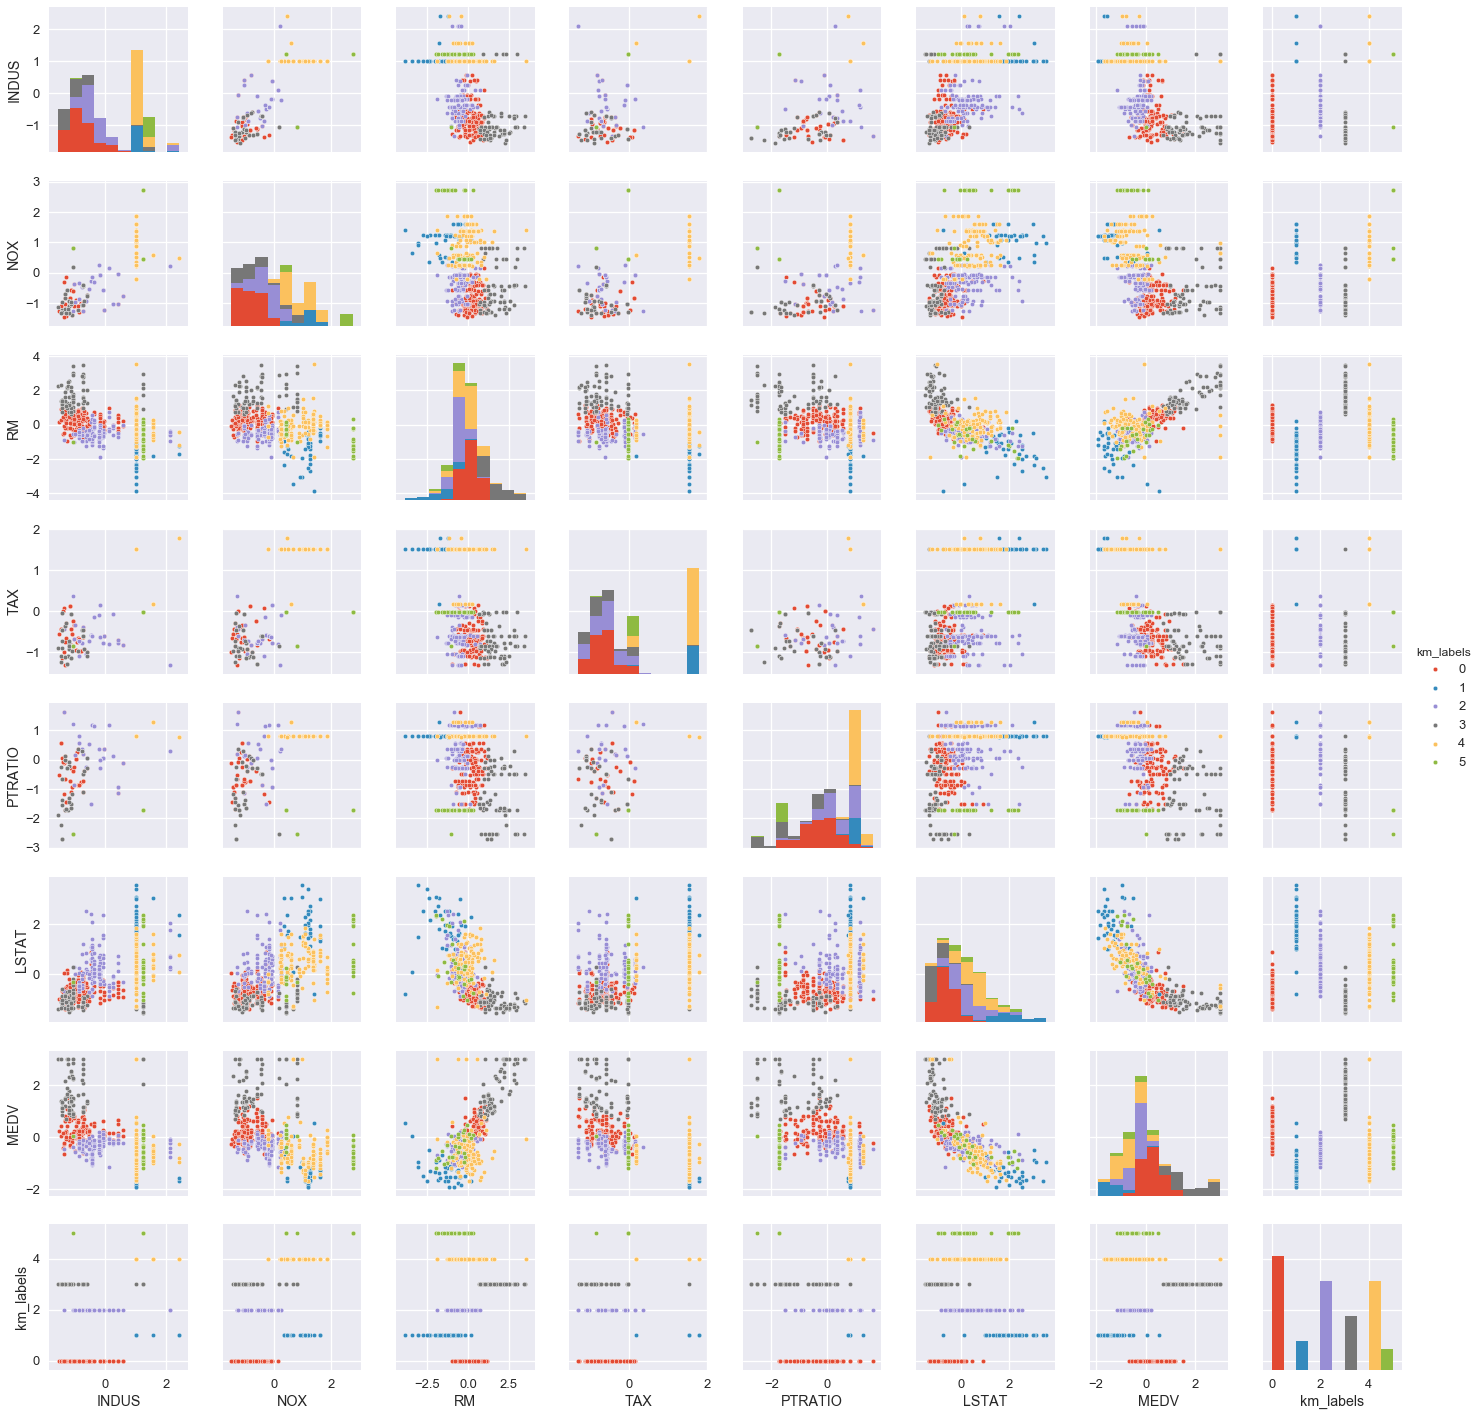

In [187]:
sns.pairplot(df_kmeans, hue = 'km_labels', plot_kws={"s": 20},);

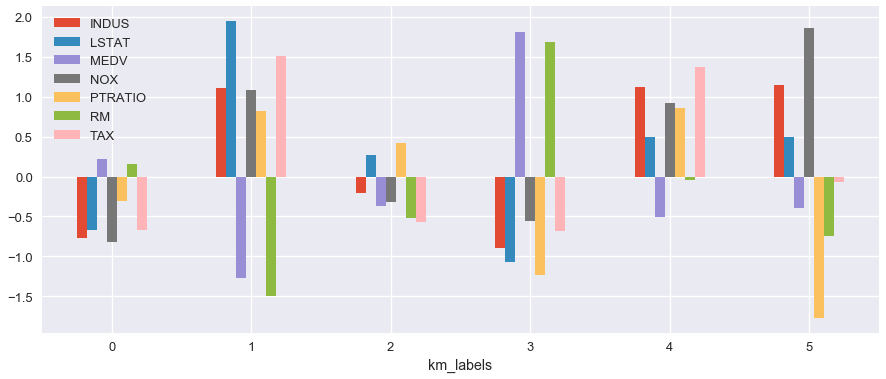

In [175]:
df_mean_km = pd.pivot_table(df_kmeans, values=None, index="km_labels", aggfunc='mean')
df_mean_km.plot.bar(figsize = (15,6))
plt.xticks(rotation=0)
plt.show();

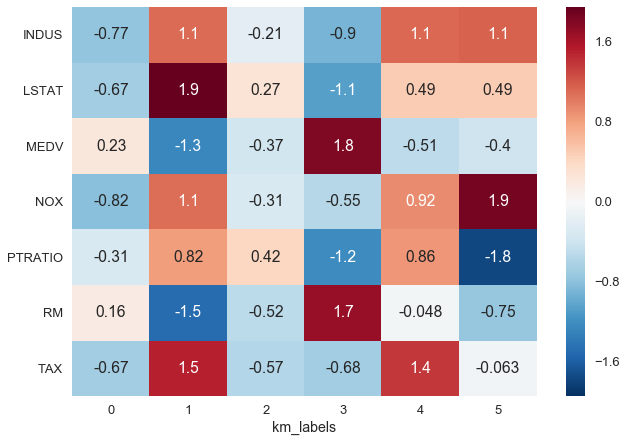

In [193]:
sns.heatmap(df_mean_km.T, annot=True);

### Summary

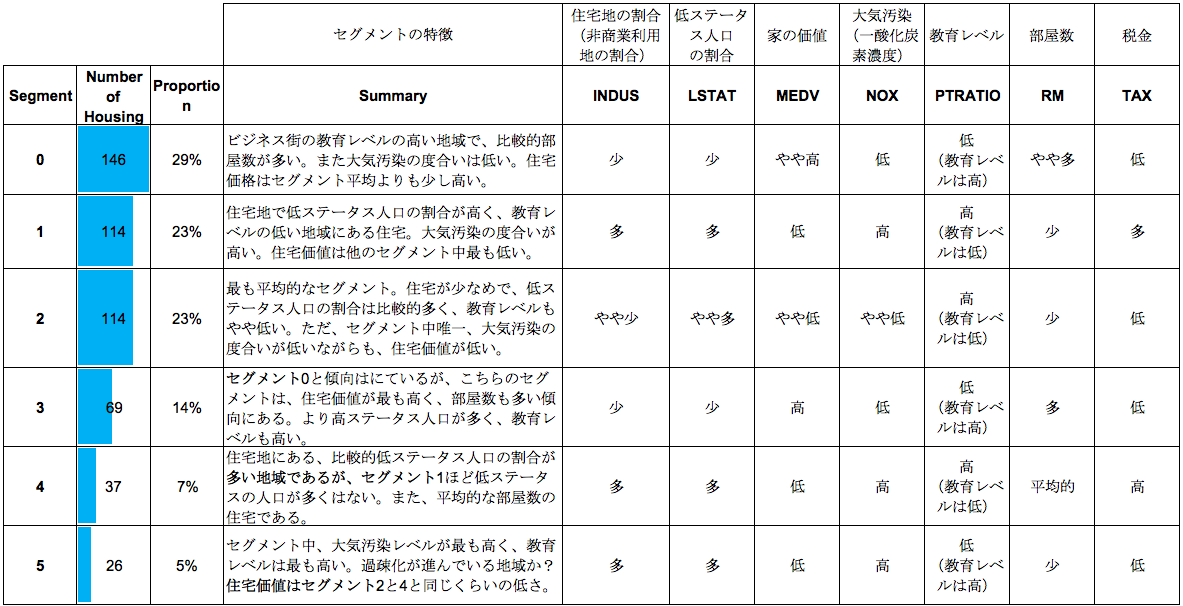

In [195]:
from IPython.display import Image
Image("housing_segmentation.png")